In [33]:
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv("house_prices_practice.csv")

In [5]:
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice
0,1,7,1560,0,1658,1969,2,1,8059,177106
1,2,4,2827,2,1319,2012,3,4,13530,301044
2,3,8,3920,0,841,2010,1,4,9010,360609
3,4,5,3044,0,1058,1998,0,4,13207,240556
4,5,7,801,1,2428,2020,0,1,9117,193656


In [8]:
x = df.drop(["Id", "SalePrice"], axis=1)
y = df['SalePrice']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [11]:
std = StandardScaler()

In [12]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [14]:
dt_reg = DecisionTreeRegressor(max_depth=3)

In [15]:
adaboost = AdaBoostRegressor(estimator=dt_reg, n_estimators=50, learning_rate=1, loss='linear')

In [16]:
model = adaboost.fit(x_train, y_train)

In [17]:
model.score(x_train, y_train)

0.9058846277067212

In [18]:
model.score(x_test, y_test)

0.8166215540669671

In [19]:
y_pred = model.predict(x_test)

In [30]:
mean_squared_error(y_pred, y_test)

1040449532.4127364

In [31]:
mean_absolute_error(y_pred, y_test)

25320.308744744547

In [38]:
model.estimator_

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


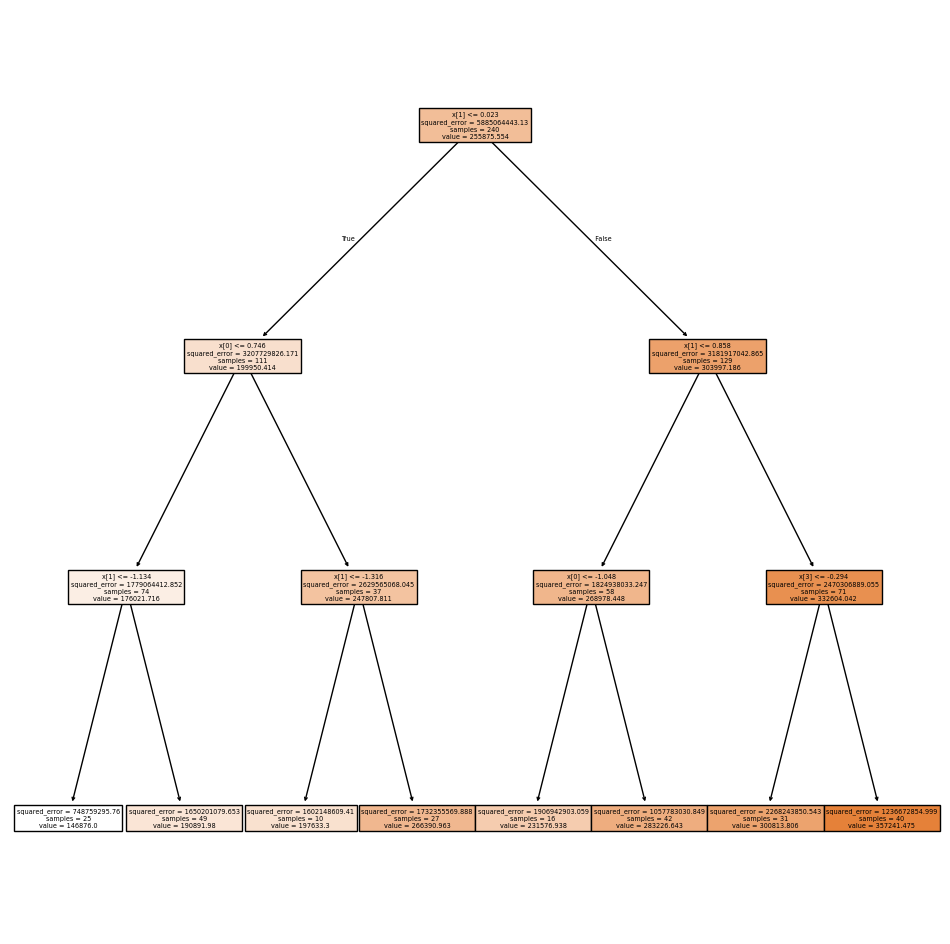

In [46]:
plt.figure(figsize=(12,12))
plot_tree(model.estimators_[2], filled=True)
plt.show()

### Hyparameter Tuning

In [22]:
param = {
  "n_estimators":[50, 100,200, 500],
      "learning_rate":[.1, .5, 1],
       "loss":['linear', 'square', 'exponential']
}

In [23]:
grid_cv = GridSearchCV(estimator=adaboost, param_grid=param, n_jobs=-1, cv = 5)

In [25]:
grid_model = grid_cv.fit(x_train, y_train)

In [26]:
grid_model.score(x_train, y_train)

0.9372505138650267

In [28]:
grid_model.score(x_test, y_test)

0.864319618106312

In [59]:
y_pred2 = grid_model.predict(x)

c:\Users\ABDULLAH AL MASUM\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but AdaBoostRegressor was fitted without feature names
  warnings.warn(


In [63]:
df['pred_y'] = y_pred2

In [65]:
df['error'] = abs(df['pred_y'] - df['SalePrice'])

In [66]:
df.head()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,YearBuilt,FullBath,BedroomAbvGr,LotArea,SalePrice,pred_y,error
0,1,7,1560,0,1658,1969,2,1,8059,177106,364840.821429,187734.821429
1,2,4,2827,2,1319,2012,3,4,13530,301044,384734.588235,83690.588235
2,3,8,3920,0,841,2010,1,4,9010,360609,369477.200000,8868.200000
3,4,5,3044,0,1058,1998,0,4,13207,240556,359211.964286,118655.964286
4,5,7,801,1,2428,2020,0,1,9117,193656,372896.571429,179240.571429


In [67]:
from sklearn.linear_model import LinearRegression

In [69]:
Lin_Reg = LinearRegression()

In [70]:
model = Lin_Reg.fit(x_train, y_train)

In [71]:
model.score(x_train, y_train)

0.97903560732947

In [73]:
model.score(x_test, y_test)

0.9724369952260822

In [74]:
y_pred3 = model.predict(x_test)

In [75]:
mean_absolute_error(y_test, y_pred3)

10431.655979708497

In [76]:
mean_squared_error(y_test, y_pred3)

156386511.4190439